In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway, pearsonr
from pingouin import rm_anova

In [2]:
# mean estimator with Fisher z transformation for correlations
def fisher_mean(correlation, axis=None):
    return np.tanh(np.nanmean(np.arctanh(correlation), axis=axis))

In [3]:
# 8 movie stimuli, each 246 TRs, 112 subjects, 210 ROIs
n_stimuli = 8
n_trs = 246
n_subjects = 112
n_rois = 210

In [4]:
# shared component for each stimulus
np.random.seed(1312)
shared = np.random.randn(n_stimuli, n_trs)

# duplicate signal across ROIs
signal = np.repeat(shared[np.newaxis], n_rois, axis=0)
signal = np.repeat(signal[:, :, np.newaxis], n_subjects, axis=2)

# create noise
noise = np.random.randn(n_rois, n_stimuli, n_subjects, n_trs)

# scale noise differently across ROIs
roi_noise = noise * np.linspace(1, 1.5, n_rois)[:, np.newaxis, np.newaxis, np.newaxis]

data = signal + roi_noise
print(f'data shape: {data.shape}')

data shape: (210, 8, 112, 246)


In [5]:
iscs, fs = [], []
for roi_i in np.arange(n_rois):
    stim_iscs = []
    for stim_i in np.arange(n_stimuli):
        isc = np.corrcoef(data[roi_i, stim_i])
        stim_iscs.append(isc[np.triu_indices_from(isc, k=1)])
    
    roi_df = {'ISC': [], 'stimulus': [], 'pair': []}
    for s, r in enumerate(stim_iscs):
        roi_df['ISC'].extend(r)
        roi_df['stimulus'].extend([s] * len(r))
        roi_df['pair'].extend(np.arange(len(r)))
    roi_df = pd.DataFrame(roi_df)

    # compute mean ISC
    iscs.append(fisher_mean(np.ravel(stim_iscs)))

    # running ANOVA on all pairs will inflate df and F, but
    # the scale of F doesn't matter for the final correlation
    fs.append(rm_anova(data=roi_df, dv='ISC', within='stimulus', subject='pair').F.item())

r = 0.78559 (p = 3.018374533625202e-45)


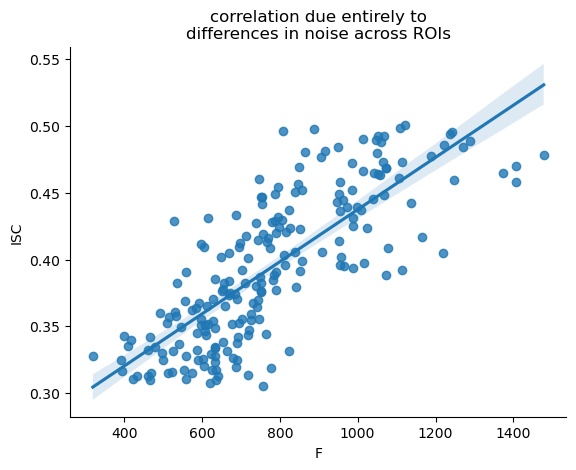

In [6]:
# compute correlation
r, p = pearsonr(iscs, fs)
print(f'r = {r:.5f} (p = {p})')

# visualize scatter plot
results_df = pd.DataFrame({'ISC': iscs, 'F': fs})
sns.regplot(results_df, x='F', y='ISC')
plt.title('correlation due entirely to\n'
          'differences in noise across ROIs')
sns.despine();

In [7]:
# shared component for each stimulus
np.random.seed(1312)
shared = np.random.randn(n_stimuli, n_trs)

# duplicate signal across ROIs
signal = np.repeat(shared[np.newaxis], n_rois, axis=0)
signal = np.repeat(signal[:, :, np.newaxis], n_subjects, axis=2)

# create noise
noise = np.random.randn(n_rois, n_stimuli, n_subjects, n_trs)

# *** scale noise differently across MOVIES ***
stim_noise = noise * np.linspace(1, 5, n_stimuli)[np.newaxis, :, np.newaxis, np.newaxis]

data = signal + stim_noise
print(f'data shape: {data.shape}')

data shape: (210, 8, 112, 246)


In [8]:
iscs, fs = [], []
for roi_i in np.arange(n_rois):
    stim_iscs = []
    for stim_i in np.arange(n_stimuli):
        isc = np.corrcoef(data[roi_i, stim_i])
        stim_iscs.append(isc[np.triu_indices_from(isc, k=1)])
    
    roi_df = {'ISC': [], 'stimulus': [], 'pair': []}
    for s, r in enumerate(stim_iscs):
        roi_df['ISC'].extend(r)
        roi_df['stimulus'].extend([s] * len(r))
        roi_df['pair'].extend(np.arange(len(r)))
    roi_df = pd.DataFrame(roi_df)

    # compute mean ISC
    iscs.append(fisher_mean(np.ravel(stim_iscs)))

    # running ANOVA on all pairs will inflate df and F, but
    # the scale of F doesn't matter for the final correlation
    fs.append(rm_anova(data=roi_df, dv='ISC', within='stimulus', subject='pair').F.item())

r = 0.34694 (p = 2.485977215887877e-07)


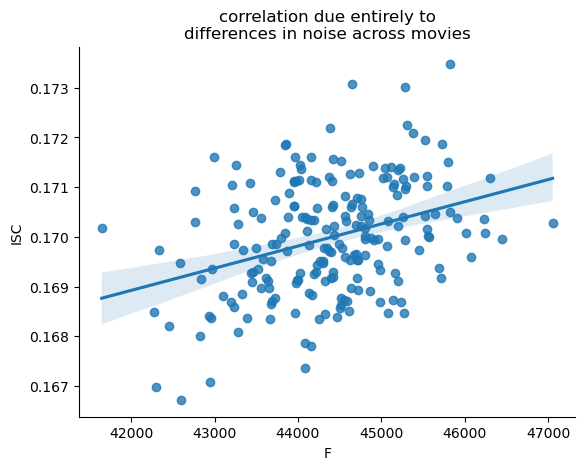

In [9]:
# compute correlation
r, p = pearsonr(iscs, fs)
print(f'r = {r:.5f} (p = {p})')

# visualize scatter plot
results_df = pd.DataFrame({'ISC': iscs, 'F': fs})
sns.regplot(results_df, x='F', y='ISC')
plt.title('correlation due entirely to\n'
          'differences in noise across movies')
sns.despine();